In [5]:
# Tratamiento de datos

import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA

In [11]:
df= pd.DataFrame(np.array([[7,6.5,9.2,8.6,8],
                          [7.5,9.4,7.3,7,7],
                          [7.6,9.2,8,8,7.5],
                          [5,6.5,6.5,7,9],
                          [6,6,7.8,8.9,7.3],
                          [7.8,9.6,7.7,8,6.5],
                          [6.3,6.4,8.2,9,7.2],
                          [7.9,9.7,7.5,8,6],
                          [6,6,6.5,5.5,8.7],
                          [6.8,7.2,8.7,9,7]]),
                 index= ["Lucia","Pedro","Ines", "Luis", "Andrés", "Ana", "Carlos", "José", "Sonia", "María"],
                 columns=["Matemáticas", "Ciencias", "Español", "Historia", "EdFísica"])
                          
df

,Matemáticas,Ciencias,Español,Historia,EdFísica
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andrés,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
José,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7
María,6.8,7.2,8.7,9.0,7.0


In [15]:
# Determinas numero de renglones de base de datos

index= df.index
renglones= len(index)
renglones

10

In [17]:
# Estandarización variables de bases de datos

df2= StandardScaler().fit_transform(df)
df2

array([[ 0.23263076, -0.7529862 ,  1.78848525,  0.65792263,  0.65858084],
       [ 0.78651352,  1.14584856, -0.53899555, -0.84590053, -0.47690337],
       [ 0.89729007,  1.01489444,  0.31849737,  0.09398895,  0.09083874],
       [-1.98290027, -0.7529862 , -1.51898747, -0.84590053,  1.79406505],
       [-0.87513476, -1.0803715 ,  0.07349939,  0.93988948, -0.13625811],
       [ 1.11884317,  1.27680268, -0.0489996 ,  0.09398895, -1.04464547],
       [-0.5428051 , -0.81846326,  0.56349535,  1.03387842, -0.24980653],
       [ 1.22961972,  1.34227974, -0.29399757,  0.09398895, -1.61238758],
       [-0.87513476, -1.0803715 , -1.51898747, -2.25573474,  1.45341979],
       [ 0.01107766, -0.29464677,  1.1759903 ,  1.03387842, -0.47690337]])

In [19]:
# Calcular matriz de correlaciones para la matriz transformada 
# Aquí te muestra la correlación de matemáticas con las demás materias el siguiente renglón ciencias contra las otras materias y así sucesivamente
#df2.T es transpuesta
A=(1/renglones)*np.dot(df2.T,df2)
A

array([[ 1.        ,  0.85407878,  0.38457424,  0.20719425, -0.78716269],
       [ 0.85407878,  1.        , -0.02005218, -0.02153942, -0.68772056],
       [ 0.38457424, -0.02005218,  1.        ,  0.82091619, -0.36554342],
       [ 0.20719425, -0.02153942,  0.82091619,  1.        , -0.50800132],
       [-0.78716269, -0.68772056, -0.36554342, -0.50800132,  1.        ]])

In [21]:
# Entrenamiento del modelo PCA con el escalado de los datos
# PCA ya hace la estandarización por eso se usa df
pca_pipe= make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(df)

# se extrae el modelo entrenado del pipeline
modelo_pca= pca_pipe.named_steps["pca"]

print("Eigenvalores:")
results= LA.eigvals(A)
print(results)

#Indica que varible tiene mayor peso, en este caso es la primera matemáticas

Eigenvalores:
[2.89324967 1.62865042 0.34659605 0.00889139 0.12261246]


In [23]:
# Porcentaje de la varianza explicada por cada nuevo componente
# los dos primero componentes si se suman explican más del 90%, por lo tanto se pueden tomar sólo 2

print( "Porcentaje explicado de cada componente:")
print(modelo_pca.explained_variance_ratio_)

Porcentaje explicado de cada componente:
[0.57864993 0.32573008 0.06931921 0.02452249 0.00177828]


In [25]:
# Cálculo de los eigenvectores
print( "Eignevectores (por renglón):")
pd.DataFrame(data= modelo_pca.components_,columns= df.columns, index= ["PC1", "PC2", "PC3", "PC4", "PC5"])

Eignevectores (por renglón):


,Matemáticas,Ciencias,Español,Historia,EdFísica
PC1,-0.526644,-0.424936,-0.359147,-0.352697,0.537302
PC2,-0.270496,-0.508072,0.562082,0.586490,0.093746
PC3,0.438201,0.040495,0.562276,-0.394180,0.578626
PC4,-0.261218,0.673627,-0.070086,0.446645,0.523056
PC5,-0.623878,0.325390,0.483747,-0.420433,-0.306794


In [27]:
# Proyecciones de los componentes
proyecciones= np.dot(modelo_pca.components_,df2.T)
proyecciones= pd.DataFrame(proyecciones, index=["PC1", "PC2", "PC3", "PC4", "PC5"])
proyecciones= proyecciones.transpose().set_index(df.index)
proyecciones

,PC1,PC2,PC3,PC4,PC5
Lucia,-0.323063,1.772525,1.198801,-0.055015,-0.003633
Pedro,-0.665441,-1.638702,0.145476,-0.023065,0.123377
Ines,-1.002547,-0.515692,0.628888,0.516444,-0.142876
Luis,3.172095,-0.262782,-0.381960,0.677777,0.062504
Andrés,0.488868,1.365402,-0.835236,-0.155792,-0.123367
Ana,-1.708633,-1.021700,-0.127077,0.066833,-0.025292
Carlos,-0.067586,1.462336,-0.506240,-0.117928,-0.013124
José,-2.011855,-1.275865,-0.542150,-0.197787,-0.017434
Sonia,3.042030,-1.254881,0.448829,-0.639999,-0.037885
María,-0.923869,1.369359,-0.029330,-0.071467,0.177730


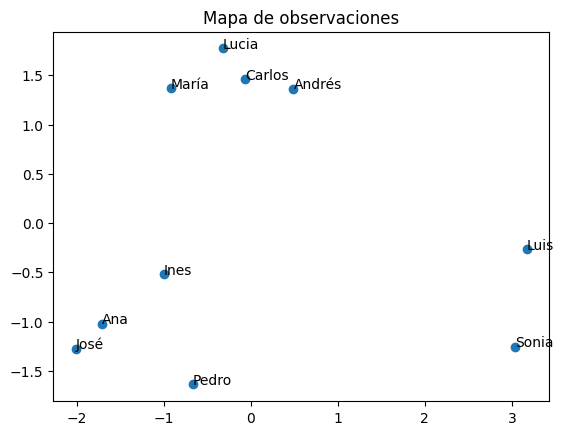

In [29]:
# Se toma sólo la columna PC1 y PC2, ya que entre estas explican más del 90%
X= proyecciones.iloc[:,0]
y= proyecciones.iloc[:,1]
z= df.index
X= X.to_numpy()
y= y.to_numpy()

fig, ax= plt.subplots()
ax.set_title("Mapa de observaciones")
ax.scatter(X,y)

# Para i que va ir del 1 al 10, ya que z tiene 10 datos, se va a agarrar el texto del número en el que va z y se va a anotar el texto en X[i], y[i] dentro del gráfico
for i, txt in enumerate(z):
    ax.annotate(txt,(X[i],y[i]))

# Se pueden observar 3 grupos (clusters)

In [31]:
# Buscar que es lo que agrupa a las variables

componentes_2= pd.DataFrame(data= modelo_pca.components_,
                            columns= df.columns,
                            index=["PC1", "PC2", "PC3", "PC4", "PC5"])
componentes_2= componentes_2.iloc[0:2,:] #Sólo se toma 0 y 1 por que son los renglones de PC1 y PC2
componentes_2= componentes_2.T
componentes_2

,PC1,PC2
Matemáticas,-0.526644,-0.270496
Ciencias,-0.424936,-0.508072
Español,-0.359147,0.562082
Historia,-0.352697,0.586490
EdFísica,0.537302,0.093746


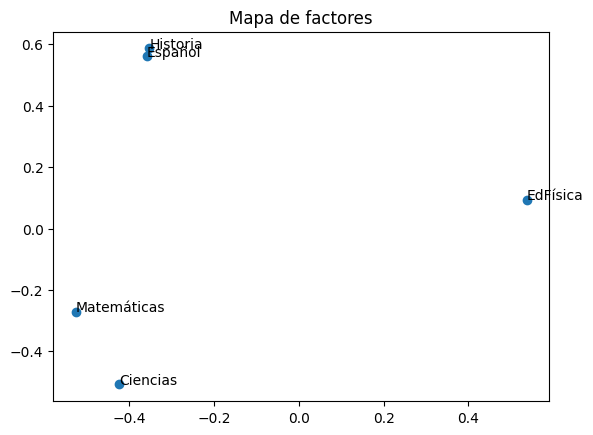

In [53]:
X= componentes_2.iloc[:,0]
y= componentes_2.iloc[:,1]
z= componentes_2.index
X= X.to_numpy()
y= y.to_numpy()

fig, ax= plt.subplots()
ax.set_title("Mapa de factores")
ax.scatter(X,y)

# Para i que va ir del 1 al 10, ya que z tiene 10 datos, se va a agarrar el texto del número en el que va z y se va a anotar el texto en X[i], y[i] dentro del gráfico
for i, txt in enumerate(z):
    ax.annotate(txt,(X[i],y[i]))

# Esto se hace para encontrar correlaciones entre las variables
# Lucia,María, Carlos y Andrés tienen una alta correlación en Historia y español y tienen las mayores calificaciones
# Luis y Sonia en Edfísica y tienen las mayores calificaciones
# José, Ana, Ines y Pedro en Mate y cienciasy tienen las mayores calificaciones

In [55]:
# Procedimiento para obtener la matriz estandarizada original
# np.dot es para multiplicar 2 matrices

original= np.dot(modelo_pca.components_.T, proyecciones.T) # Se multiplican estas matrices
original= original.T
print( original)

[[ 0.23263076 -0.7529862   1.78848525  0.65792263  0.65858084]
 [ 0.78651352  1.14584856 -0.53899555 -0.84590053 -0.47690337]
 [ 0.89729007  1.01489444  0.31849737  0.09398895  0.09083874]
 [-1.98290027 -0.7529862  -1.51898747 -0.84590053  1.79406505]
 [-0.87513476 -1.0803715   0.07349939  0.93988948 -0.13625811]
 [ 1.11884317  1.27680268 -0.0489996   0.09398895 -1.04464547]
 [-0.5428051  -0.81846326  0.56349535  1.03387842 -0.24980653]
 [ 1.22961972  1.34227974 -0.29399757  0.09398895 -1.61238758]
 [-0.87513476 -1.0803715  -1.51898747 -2.25573474  1.45341979]
 [ 0.01107766 -0.29464677  1.1759903   1.03387842 -0.47690337]]
